In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# 日本語表示
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

# Warningを非表示
import warnings
warnings.filterwarnings('ignore')

In [27]:
# データ取得
df_stock = pd.read_csv("8058_mitsubishi_monthly.csv")
df_stock.head()

,month,open,high,low,close,valume,close_arranged
0,1992/01/01,1330.0,1330.0,1150.0,1180.0,10202000,1180.0
1,1992/02/01,1190.0,1200.0,1060.0,1150.0,12973000,1150.0
2,1992/03/01,1150.0,1170.0,1010.0,1040.0,17846000,1040.0
3,1992/04/01,1030.0,1080.0,970.0,1060.0,16597000,1060.0
4,1992/05/01,1050.0,1120.0,999.0,1020.0,13509000,1020.0


In [28]:
df_stock.describe()

,open,high,low,close,valume,close_arranged
count,306.000000,306.000000,306.000000,306.000000,3.060000e+02,306.000000
mean,1566.794118,1668.504902,1453.356209,1569.588235,1.081164e+08,1569.588235
std,694.086033,738.580477,638.337741,695.954601,8.530022e+07,695.954601
min,627.000000,669.000000,577.000000,617.000000,7.682000e+06,617.000000
25%,999.250000,1069.250000,930.000000,991.500000,2.972325e+07,991.500000
50%,1322.500000,1429.500000,1260.000000,1322.000000,1.028368e+08,1322.000000
75%,2053.500000,2181.000000,1921.750000,2061.500000,1.522920e+08,2061.500000
max,3700.000000,3950.000000,3430.000000,3640.000000,4.741073e+08,3640.000000


In [29]:
df_stock.dtypes

month              object
open              float64
high              float64
low               float64
close             float64
valume              int64
close_arranged    float64
dtype: object

In [30]:
# データ取得
df_com = pd.read_csv("commodity_price_list_monthly.csv")
df_com.head()

,month,i_all_commodity,i_non_fuel_price,i_food_beverage,i_food,i_beverage,i_industrial_inputs,i_agricultural_raw_material,i_metal_price,i_fuel,i_crude_oil,aluminum,copper,natural_gas,crude_oil,rice,sugar
0,1992/01/01,52.89,83.33,96.10,97.99,78.67,70.43,87.01,58.45,35.07,32.77,1181.23,2150.58,1.44,17.52,276.0,30.17
1,1992/02/01,53.03,83.71,95.67,98.21,72.21,71.62,86.86,60.61,35.08,33.00,1270.75,2208.89,1.18,17.65,278.0,29.55
2,1992/03/01,52.75,83.72,94.92,97.46,71.44,72.40,88.13,61.04,34.63,32.49,1282.02,2231.79,1.26,17.35,277.0,28.68
3,1992/04/01,54.28,84.33,92.97,95.46,70.02,75.61,94.44,62.01,36.70,34.91,1317.13,2214.17,1.39,18.65,279.0,29.21
4,1992/05/01,55.59,85.31,94.40,97.30,67.66,76.12,95.54,62.09,38.20,36.55,1306.71,2219.32,1.55,19.52,274.0,30.11


In [31]:
df_com.describe()

,i_all_commodity,i_non_fuel_price,i_food_beverage,i_food,i_beverage,i_industrial_inputs,i_agricultural_raw_material,i_metal_price,i_fuel,i_crude_oil,aluminum,copper,natural_gas,crude_oil,rice,sugar
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,100.796209,116.171797,120.745458,120.377124,124.143595,111.551765,111.483007,111.600915,91.801307,91.286307,1760.019804,4245.849575,3.970425,48.587908,355.969216,26.943758
std,50.113040,35.521673,33.709103,33.559643,40.205663,39.044720,17.203252,57.500247,59.861195,61.772268,444.451086,2526.630996,2.251079,32.796480,147.202112,2.753862
min,41.980000,70.370000,75.830000,76.040000,60.650000,64.460000,81.450000,48.020000,22.090000,19.540000,1040.020000,1377.380000,1.180000,10.410000,162.100000,20.510000
25%,58.537500,85.205000,94.570000,95.482500,87.015000,76.702500,98.710000,60.720000,38.267500,36.430000,1424.220000,1884.620000,2.270000,19.462500,252.765000,25.382500
50%,83.435000,101.045000,107.995000,108.060000,118.490000,96.450000,109.775000,84.365000,72.345000,70.215000,1661.860000,3058.295000,3.325000,37.485000,319.250000,26.540000
75%,134.400000,143.282500,146.237500,145.112500,159.837500,148.350000,120.452500,168.322500,134.322500,136.247500,1948.697500,6837.670000,5.142500,72.645000,435.910000,27.822500
max,220.030000,206.480000,196.000000,193.770000,221.990000,217.070000,171.360000,256.240000,249.610000,249.660000,3067.460000,9880.940000,13.630000,132.550000,1015.210000,34.430000


In [32]:
df_com.dtypes

month                           object
i_all_commodity                float64
i_non_fuel_price               float64
i_food_beverage                float64
i_food                         float64
i_beverage                     float64
i_industrial_inputs            float64
i_agricultural_raw_material    float64
i_metal_price                  float64
i_fuel                         float64
i_crude_oil                    float64
aluminum                       float64
copper                         float64
natural_gas                    float64
crude_oil                      float64
rice                           float64
sugar                          float64
dtype: object

## 株価の推移

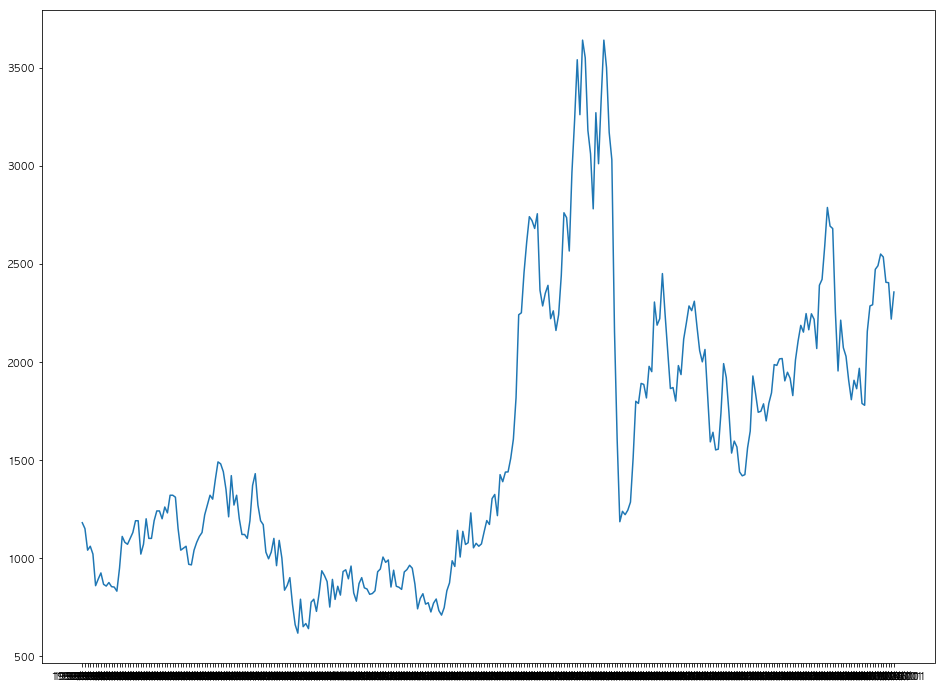

In [33]:
plt.figure(figsize=(16, 12))
plt.plot(df_stock['month'], df_stock['close'])

## 資源価格の推移の確認

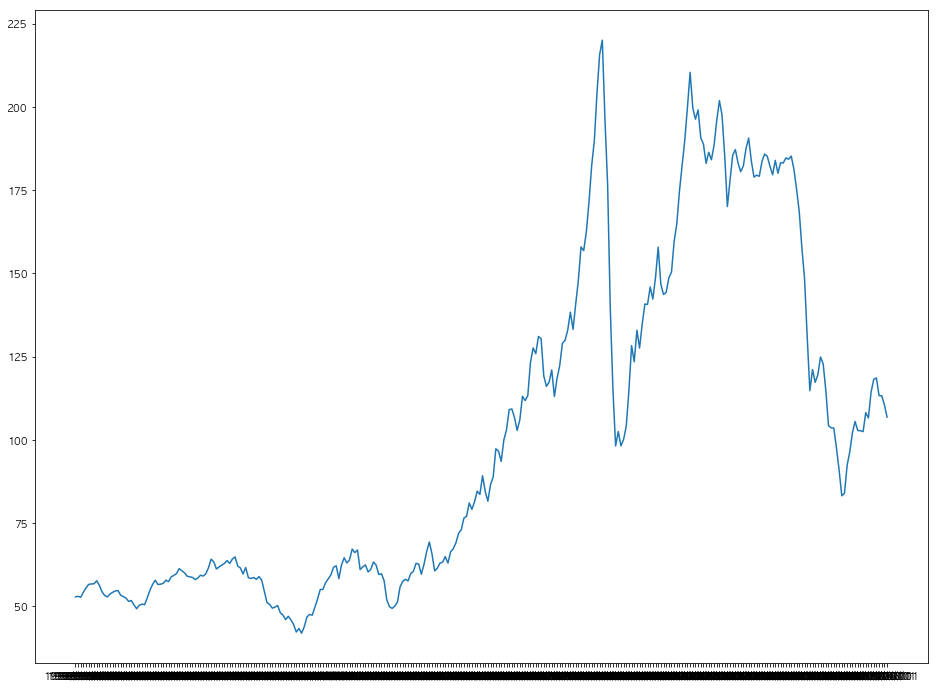

In [34]:
plt.figure(figsize=(16, 12))
plt.plot(df_com['month'], df_com['i_all_commodity'])

## トレーニングと予測

In [115]:
x = df_com[['i_non_fuel_price','i_food_beverage','i_industrial_inputs','i_agricultural_raw_material','i_metal_price','i_fuel']
].values
y = df_stock['close'].values
x.shape, y.shape

((306, 6), (306,))

In [116]:
#  train, cross validation に分ける
train_size = 0.8
divided_index = int(len(x) * train_size)
x_train, y_train = x[:divided_index], y[:divided_index]
x_val,    y_val   = x[divided_index:], y[divided_index:]
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape)

(((244, 6), (244,)), ((62, 6), (62,)))

In [117]:
# 重回帰分析
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)

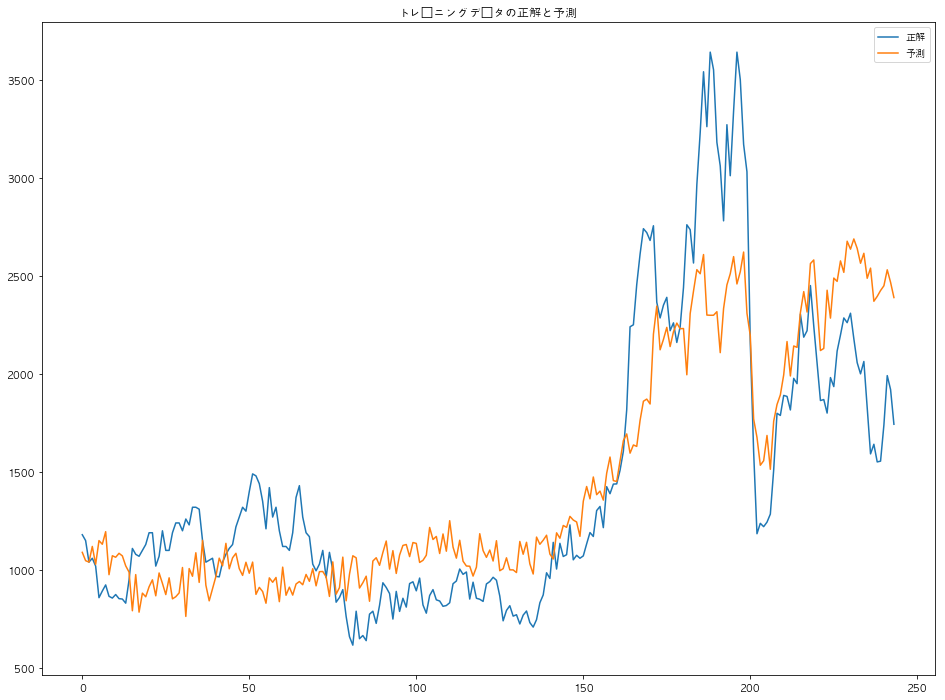

In [118]:
# 5日の移動平均にしてみる
# それなりに予測できている
plt.figure(figsize=(16, 12))
xlin = np.arange(0, len(y_train))
plt.title('トレーニングデータの正解と予測')
plt.plot(xlin, y_train, label='正解')
plt.plot(xlin, y_train_pred, label='予測')
plt.legend()
plt.show()

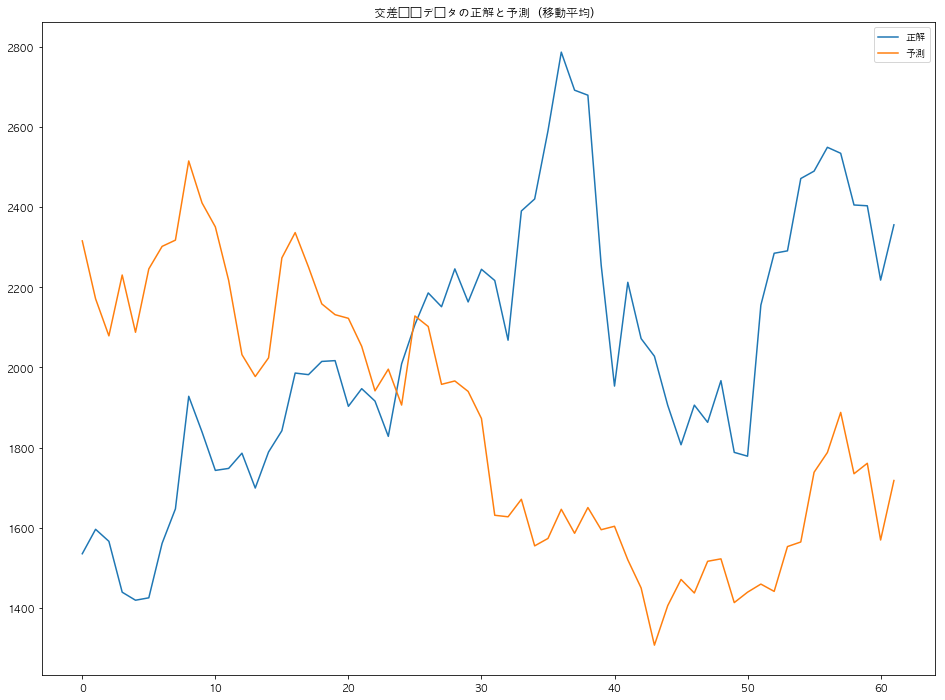

In [119]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize=(16, 12))
xlin = np.arange(0, len(y_val))
plt.title('交差検証データの正解と予測（移動平均）')
plt.plot(xlin, y_val, label='正解')
plt.plot(xlin, y_val_pred, label='予測')
plt.legend()
plt.show()